# **CARBON MAJORS EMISSIONS** 

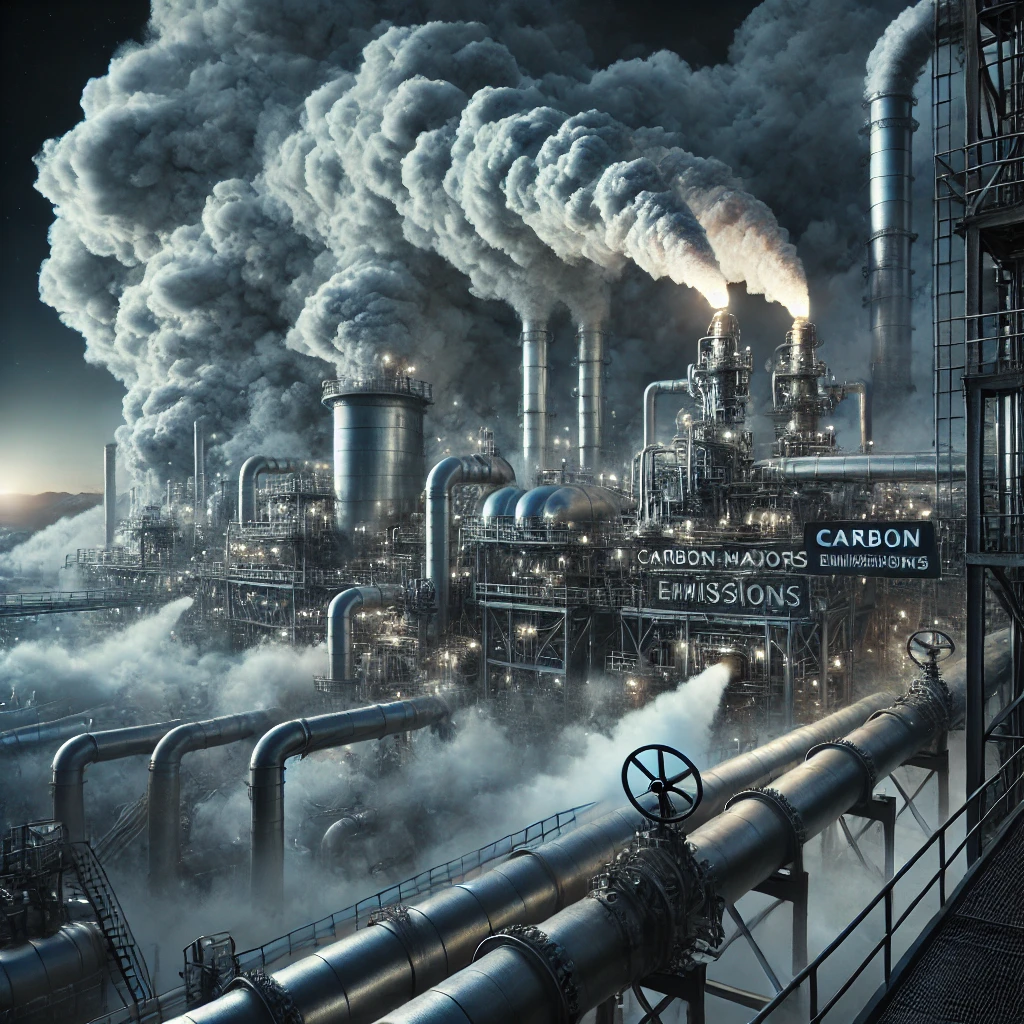

## **Background**
The "Carbon Majors Emissions Data" dataset, sourced from the Carbon Majors Database and available on Kaggle, presents over a century (1854–2022) of greenhouse gas (GHG) emissions data from leading global contributors. Emissions are categorized by company, ownership type (e.g., investor-owned, state-owned), commodity (coal, oil, gas, cement), emission types (e.g., flaring, venting, methane leakage), geographical location (country, continent), and time (year). This dataset plays a pivotal role in uncovering the entities, industries, and nations most responsible for GHG emissions, thus aiding climate accountability, policy formation, net-zero transition planning, and equitable climate finance. By identifying disproportionately high emitters and overlooked contributors, it facilitates deeper understanding of climate responsibility and supports strategies for a just transition.

## **Objectives**
- To identify which types of emissions contribute most to overall carbon output, enabling targeted emission reduction strategies.
- To rank top companies responsible for the largest share of global emissions.  
- To compare emissions contributions of investor-owned firms, state-owned enterprises, and nation states.  
- Track historical emissions trends, identifying accelerations, slowdowns, and policy impacts.  
- Analyze emissions by commodity type, including coal, oil, gas, and cement.  
- To assess the geographical distribution of carbon emissions across continents to identify global hotspots and historical burdens, inform climate justice discussions, attribute responsibility, and guide targeted interventions.
- To determine how emissions scale with production activity across different organizational ownership types, and whether economic size justifies emission levels.
- To normalize emissions by revenue or output to assess carbon efficiency.
- To evaluate how governance structures influence operational emissions intensity to inform targeted ownership-based emissions policies.
- To analyze the Evolution of Cumulative Operational Emissions by Ownership Type Over Time

## **Expected Outcomes**
By the end of this analysis, we expect to:
- Highlight the key entities and regions responsible for the majority of industrial emissions.
- Provide policymakers, researchers, and the public with clear visualizations and data-driven narratives.
- Reveal disparities between public vs. private emissions contributions.
- Identify opportunities for targeted mitigation strategies in both industry and governance.
- Support climate transparency and accountability at a global scale.

## **Group Members**
1. Juliet Fafali Kukuia
2. Esther Dankwah Affum
3. Augustine Ofosu
4. Akua Shammah
5. Joseph Aloogoba Akeliwira

In [4]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and combining the dataset

In [6]:
# loading the dataset

# Load each CSV file
df1 = pd.read_csv('emissions_high_granularity.csv')
df2 = pd.read_csv('emissions_high_granularity.csv')
df3 = pd.read_csv('emissions_high_granularity.csv')

carbon_emissions = pd.concat([df1, df2, df3], ignore_index=True)

### Displaying the various datasets as one

In [8]:
carbon_emissions.head()

year                   parent_entity         parent_type reporting_entity  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
1  1963  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
2  1964  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
3  1965  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
4  1966  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   

   commodity  production_value production_unit  product_emissions_MtCO2  \
0  Oil & NGL            0.9125  Million bbl/yr                 0.338928   
1  Oil & NGL            1.8250  Million bbl/yr                 0.677855   
2  Oil & NGL            7.3000  Million bbl/yr                 2.711422   
3  Oil & NGL           10.9500  Million bbl/yr                 4.067132   
4  Oil & NGL           13.5050  Million bbl/yr                 5.016130   

   flaring_emissions_MtCO2  venting_emissions_MtCO2  \
0                 0.005404                 0.001299   
1                 0.010808                 0.002598   
2                 0.043233                 0.010392   
3                 0.064849                 0.015588   
4                 0.079980                 0.019225   

   own_fuel_use_emissions_MtCO2  fugitive_methane_emissions_MtCO2e  \
0                           0.0                           0.018254   
1                           0.0                           0.036508   
2                           0.0                           0.146033   
3                           0.0                           0.219049   
4                           0.0                           0.270160   

   fugitive_methane_emissions_MtCH4  total_operational_emissions_MtCO2e  \
0                          0.000652                            0.024957   
1                          0.001304                            0.049914   
2                          0.005215                            0.199657   
3                          0.007823                            0.299486   
4                          0.009649                            0.369366   

   total_emissions_MtCO2e                                             source  
0                0.363885  Abu Dhabi National Oil Company Annual Report 1...  
1                0.727770  Abu Dhabi National Oil Company Annual Report 1...  
2                2.911079  Abu Dhabi National Oil Company Annual Report 1...  
3                4.366618  Abu Dhabi National Oil Company Annual Report 1...  
4                5.385495  Abu Dhabi National Oil Company Annual Report 1...

In [9]:
carbon_emissions.tail()

year parent_entity         parent_type reporting_entity    commodity  \
47386  2020           YPF  State-owned Entity              YPF  Natural Gas   
47387  2021           YPF  State-owned Entity              YPF    Oil & NGL   
47388  2021           YPF  State-owned Entity              YPF  Natural Gas   
47389  2022           YPF  State-owned Entity              YPF    Oil & NGL   
47390  2022           YPF  State-owned Entity              YPF  Natural Gas   

       production_value production_unit  product_emissions_MtCO2  \
47386             394.0          Bcf/yr                21.052898   
47387              90.0  Million bbl/yr                33.428485   
47388             403.0          Bcf/yr                21.533801   
47389              98.0  Million bbl/yr                36.399906   
47390             423.0          Bcf/yr                22.602476   

       flaring_emissions_MtCO2  venting_emissions_MtCO2  \
47386                 0.036539                 0.600718   
47387                 0.533005                 0.128118   
47388                 0.037373                 0.614440   
47389                 0.580383                 0.139506   
47390                 0.039228                 0.644933   

       own_fuel_use_emissions_MtCO2  fugitive_methane_emissions_MtCO2e  \
47386                      1.205581                           5.823079   
47387                      0.000000                           1.800403   
47388                      1.233120                           5.956093   
47389                      0.000000                           1.960438   
47390                      1.294317                           6.251681   

       fugitive_methane_emissions_MtCH4  total_operational_emissions_MtCO2e  \
47386                          0.207967                            7.665916   
47387                          0.064300                            2.461525   
47388                          0.212718                            7.841026   
47389                          0.070016                            2.680328   
47390                          0.223274                            8.230159   

       total_emissions_MtCO2e                            source  
47386               28.718814  YPF Form 20-F for 2021, page 36.  
47387               35.890011  YPF Form 20-F for 2021, page 36.  
47388               29.374827  YPF Form 20-F for 2021, page 36.  
47389               39.080234  YPF Form 20-F for 2022, page 38.  
47390               30.832635  YPF Form 20-F for 2022, page 38.

### Finding dataset info 

In [11]:
# Display the carbon dataset info
carbon_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47391 entries, 0 to 47390
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                47391 non-null  int64  
 1   parent_entity                       47391 non-null  object 
 2   parent_type                         47391 non-null  object 
 3   reporting_entity                    47391 non-null  object 
 4   commodity                           47391 non-null  object 
 5   production_value                    47391 non-null  float64
 6   production_unit                     47391 non-null  object 
 7   product_emissions_MtCO2             47391 non-null  float64
 8   flaring_emissions_MtCO2             47391 non-null  float64
 9   venting_emissions_MtCO2             47391 non-null  float64
 10  own_fuel_use_emissions_MtCO2        47391 non-null  float64
 11  fugitive_methane_emissions_MtCO2e   47391

In [12]:
# checking the number of rows and columns
carbon_emissions.shape

(47391, 16)

- **This dataset contains 47,391 rows and 16 columns**

In [14]:
# display columns
carbon_emissions.columns

Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'source'],
      dtype='object')

### Data Cleaning 

In [16]:
carbon_emissions[carbon_emissions.duplicated()]

year                   parent_entity         parent_type  \
15797  1962  Abu Dhabi National Oil Company  State-owned Entity   
15798  1963  Abu Dhabi National Oil Company  State-owned Entity   
15799  1964  Abu Dhabi National Oil Company  State-owned Entity   
15800  1965  Abu Dhabi National Oil Company  State-owned Entity   
15801  1966  Abu Dhabi National Oil Company  State-owned Entity   
...     ...                             ...                 ...   
47386  2020                             YPF  State-owned Entity   
47387  2021                             YPF  State-owned Entity   
47388  2021                             YPF  State-owned Entity   
47389  2022                             YPF  State-owned Entity   
47390  2022                             YPF  State-owned Entity   

      reporting_entity    commodity  production_value production_unit  \
15797        Abu Dhabi    Oil & NGL            0.9125  Million bbl/yr   
15798        Abu Dhabi    Oil & NGL            1.8250  Million bbl/yr   
15799        Abu Dhabi    Oil & NGL            7.3000  Million bbl/yr   
15800        Abu Dhabi    Oil & NGL           10.9500  Million bbl/yr   
15801        Abu Dhabi    Oil & NGL           13.5050  Million bbl/yr   
...                ...          ...               ...             ...   
47386              YPF  Natural Gas          394.0000          Bcf/yr   
47387              YPF    Oil & NGL           90.0000  Million bbl/yr   
47388              YPF  Natural Gas          403.0000          Bcf/yr   
47389              YPF    Oil & NGL           98.0000  Million bbl/yr   
47390              YPF  Natural Gas          423.0000          Bcf/yr   

       product_emissions_MtCO2  flaring_emissions_MtCO2  \
15797                 0.338928                 0.005404   
15798                 0.677855                 0.010808   
15799                 2.711422                 0.043233   
15800                 4.067132                 0.064849   
15801                 5.016130                 0.079980   
...                        ...                      ...   
47386                21.052898                 0.036539   
47387                33.428485                 0.533005   
47388                21.533801                 0.037373   
47389                36.399906                 0.580383   
47390                22.602476                 0.039228   

       venting_emissions_MtCO2  own_fuel_use_emissions_MtCO2  \
15797                 0.001299                      0.000000   
15798                 0.002598                      0.000000   
15799                 0.010392                      0.000000   
15800                 0.015588                      0.000000   
15801                 0.019225                      0.000000   
...                        ...                           ...   
47386                 0.600718                      1.205581   
47387                 0.128118                      0.000000   
47388                 0.614440                      1.233120   
47389                 0.139506                      0.000000   
47390                 0.644933                      1.294317   

       fugitive_methane_emissions_MtCO2e  fugitive_methane_emissions_MtCH4  \
15797                           0.018254                          0.000652   
15798                           0.036508                          0.001304   
15799                           0.146033                          0.005215   
15800                           0.219049                          0.007823   
15801                           0.270160                          0.009649   
...                                  ...                               ...   
47386                           5.823079                          0.207967   
47387                           1.800403                          0.064300   
47388                           5.956093                          0.212718   
47389                           1.960438                          0

In [17]:
# Checking the number of duplicates in our dataset
carbon_emissions.duplicated().sum()

31594

- **The dataset contains 31,594 duplicates**

In [19]:
# Dropping the duplicates and resetting index
carbon_emissions.drop_duplicates(inplace=True)
carbon_emissions.reset_index(drop=True)

year                   parent_entity         parent_type  \
0      1962  Abu Dhabi National Oil Company  State-owned Entity   
1      1963  Abu Dhabi National Oil Company  State-owned Entity   
2      1964  Abu Dhabi National Oil Company  State-owned Entity   
3      1965  Abu Dhabi National Oil Company  State-owned Entity   
4      1966  Abu Dhabi National Oil Company  State-owned Entity   
...     ...                             ...                 ...   
15792  2020                             YPF  State-owned Entity   
15793  2021                             YPF  State-owned Entity   
15794  2021                             YPF  State-owned Entity   
15795  2022                             YPF  State-owned Entity   
15796  2022                             YPF  State-owned Entity   

      reporting_entity    commodity  production_value production_unit  \
0            Abu Dhabi    Oil & NGL            0.9125  Million bbl/yr   
1            Abu Dhabi    Oil & NGL            1.8250  Million bbl/yr   
2            Abu Dhabi    Oil & NGL            7.3000  Million bbl/yr   
3            Abu Dhabi    Oil & NGL           10.9500  Million bbl/yr   
4            Abu Dhabi    Oil & NGL           13.5050  Million bbl/yr   
...                ...          ...               ...             ...   
15792              YPF  Natural Gas          394.0000          Bcf/yr   
15793              YPF    Oil & NGL           90.0000  Million bbl/yr   
15794              YPF  Natural Gas          403.0000          Bcf/yr   
15795              YPF    Oil & NGL           98.0000  Million bbl/yr   
15796              YPF  Natural Gas          423.0000          Bcf/yr   

       product_emissions_MtCO2  flaring_emissions_MtCO2  \
0                     0.338928                 0.005404   
1                     0.677855                 0.010808   
2                     2.711422                 0.043233   
3                     4.067132                 0.064849   
4                     5.016130                 0.079980   
...                        ...                      ...   
15792                21.052898                 0.036539   
15793                33.428485                 0.533005   
15794                21.533801                 0.037373   
15795                36.399906                 0.580383   
15796                22.602476                 0.039228   

       venting_emissions_MtCO2  own_fuel_use_emissions_MtCO2  \
0                     0.001299                      0.000000   
1                     0.002598                      0.000000   
2                     0.010392                      0.000000   
3                     0.015588                      0.000000   
4                     0.019225                      0.000000   
...                        ...                           ...   
15792                 0.600718                      1.205581   
15793                 0.128118                      0.000000   
15794                 0.614440                      1.233120   
15795                 0.139506                      0.000000   
15796                 0.644933                      1.294317   

       fugitive_methane_emissions_MtCO2e  fugitive_methane_emissions_MtCH4  \
0                               0.018254                          0.000652   
1                               0.036508                          0.001304   
2                               0.146033                          0.005215   
3                               0.219049                          0.007823   
4                               0.270160                          0.009649   
...                                  ...                               ...   
15792                           5.823079                          0.207967   
15793                           1.800403                          0.064300   
15794                           5.956093                          0.212718   
15795                           1.960438                          0

- **Removed 31,594 duplicate rows**

In [21]:
# checking the shape after removing duplictaes
carbon_emissions.shape 

(15797, 16)

- **This dataset now contains 15,797 rows and 16 columns**

In [23]:
# Checking the various datatypes in our dataset
carbon_emissions.dtypes

year                                    int64
parent_entity                          object
parent_type                            object
reporting_entity                       object
commodity                              object
production_value                      float64
production_unit                        object
product_emissions_MtCO2               float64
flaring_emissions_MtCO2               float64
venting_emissions_MtCO2               float64
own_fuel_use_emissions_MtCO2          float64
fugitive_methane_emissions_MtCO2e     float64
fugitive_methane_emissions_MtCH4      float64
total_operational_emissions_MtCO2e    float64
total_emissions_MtCO2e                float64
source                                 object
dtype: object

In [24]:
# Changing the data types
carbon_emissions["year"] = carbon_emissions["year"].astype("category")
carbon_emissions["parent_entity"] = carbon_emissions["parent_entity"].astype("category")
carbon_emissions["parent_type"] = carbon_emissions["parent_type"].astype("category")
carbon_emissions["commodity"] = carbon_emissions["commodity"].astype("category")
carbon_emissions["production_unit"] = carbon_emissions["production_unit"].astype("category")

In [25]:
# Calling out the data types
carbon_emissions.dtypes

year                                  category
parent_entity                         category
parent_type                           category
reporting_entity                        object
commodity                             category
production_value                       float64
production_unit                       category
product_emissions_MtCO2                float64
flaring_emissions_MtCO2                float64
venting_emissions_MtCO2                float64
own_fuel_use_emissions_MtCO2           float64
fugitive_methane_emissions_MtCO2e      float64
fugitive_methane_emissions_MtCH4       float64
total_operational_emissions_MtCO2e     float64
total_emissions_MtCO2e                 float64
source                                  object
dtype: object

In [26]:
#checking for null values
carbon_emissions.isnull().sum()

year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
source                                0
dtype: int64

- **The dataset has no null values**

In [28]:
carbon_emissions = carbon_emissions.drop(["flaring_emissions_MtCO2","venting_emissions_MtCO2","own_fuel_use_emissions_MtCO2", "source"], axis=1)
carbon_emissions.head()

year                   parent_entity         parent_type reporting_entity  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
1  1963  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
2  1964  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
3  1965  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
4  1966  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   

   commodity  production_value production_unit  product_emissions_MtCO2  \
0  Oil & NGL            0.9125  Million bbl/yr                 0.338928   
1  Oil & NGL            1.8250  Million bbl/yr                 0.677855   
2  Oil & NGL            7.3000  Million bbl/yr                 2.711422   
3  Oil & NGL           10.9500  Million bbl/yr                 4.067132   
4  Oil & NGL           13.5050  Million bbl/yr                 5.016130   

   fugitive_methane_emissions_MtCO2e  fugitive_methane_emissions_MtCH4  \
0                           0.018254                          0.000652   
1                           0.036508                          0.001304   
2                           0.146033                          0.005215   
3                           0.219049                          0.007823   
4                           0.270160                          0.009649   

   total_operational_emissions_MtCO2e  total_emissions_MtCO2e  
0                            0.024957                0.363885  
1                            0.049914                0.727770  
2                            0.199657                2.911079  
3                            0.299486                4.366618  
4                            0.369366                5.385495

## EXPLORATORY DATA ANALYSIS

In [30]:
# summary statistics 
carbon_emissions.describe()

production_value  product_emissions_MtCO2  \
count      15797.000000             15797.000000   
mean         327.879634                79.391514   
std         1188.625001               261.984080   
min            0.000000                 0.000000   
25%           11.800000                 5.996490   
50%           59.970871                21.502409   
75%          246.375000                62.191954   
max        27192.000000              7769.222235   

       fugitive_methane_emissions_MtCO2e  fugitive_methane_emissions_MtCH4  \
count                       15797.000000                      15797.000000   
mean                            8.884203                          0.317293   
std                            31.358244                          1.119937   
min                             0.000000                          0.000000   
25%                             0.607068                          0.021681   
50%                             2.351126                          0.083969   
75%                             7.401655                          0.264345   
max                           877.683714                         31.345847   

       total_operational_emissions_MtCO2e  total_emissions_MtCO2e  
count                        15797.000000            15797.000000  
mean                            10.552566               89.944080  
std                             34.790479              292.843491  
min                              0.000000                0.000000  
25%                              0.751999                7.208860  
50%                              2.869611               25.116721  
75%                              8.965620               72.255340  
max                            877.683714             8646.905949

In [31]:
# Checking unique items in the Vehicle Type column
carbon_emissions["parent_entity"].unique()

['Abu Dhabi National Oil Company', 'Adani Enterprises', 'Adaro Energy', 'Alliance Resource Partners', 'Alpha Metallurgical Resources', ..., 'Westmoreland Mining', 'Whitehaven Coal', 'Wolverine Fuels', 'Woodside Energy', 'YPF']
Length: 122
Categories (122, object): ['APA Corporation', 'Abu Dhabi National Oil Company', 'Adani Enterprises', 'Adaro Energy', ..., 'Whitehaven Coal', 'Wolverine Fuels', 'Woodside Energy', 'YPF']

- **The Parent_entity column has 122 distinct items**

In [33]:
# Checking unique items in the Vehicle Type column
carbon_emissions["parent_type"].unique()

['State-owned Entity', 'Investor-owned Company', 'Nation State']
Categories (3, object): ['Investor-owned Company', 'Nation State', 'State-owned Entity']

- **The Parent_type column has 3 distinct items namely 'State-owned Entity', 'Investor-owned Company', 'Nation State'**

In [35]:
# Checking unique items in the Vehicle Type column
carbon_emissions["commodity"].unique()

['Oil & NGL', 'Natural Gas', 'Sub-Bituminous Coal', 'Metallurgical Coal', 'Bituminous Coal', 'Thermal Coal', 'Anthracite Coal', 'Cement', 'Lignite Coal']
Categories (9, object): ['Anthracite Coal', 'Bituminous Coal', 'Cement', 'Lignite Coal', ..., 'Natural Gas', 'Oil & NGL', 'Sub-Bituminous Coal', 'Thermal Coal']

- **The dataset contains 9 distinct comprising of 'Oil & NGL', 'Natural Gas', 'Sub-Bituminous Coal', 'Metallurgical Coal', 'Bituminous Coal', 'Thermal Coal', 'Anthracite Coal', 'Cement', 'Lignite Coal'**

#### Counting the values of each category for the various columns ####

In [38]:
# Counting the values of each category in the parent_entity Column
carbon_emissions["parent_entity"].value_counts().to_frame()

count
parent_entity                            
Chevron                               949
ConocoPhillips                        674
BP                                    615
ExxonMobil                            547
Occidental Petroleum                  540
...                                   ...
CNX Resources                          12
Cloud Peak                             11
Adani Enterprises                      11
Navajo Transitional Energy Company      8
Seriti Resources                        5

[122 rows x 1 columns]

In [39]:
# Counting the values of each category in the parent_type Column
carbon_emissions["parent_type"].value_counts().to_frame()

count
parent_type                  
Investor-owned Company   9666
State-owned Entity       4077
Nation State             2054

In [40]:
# Counting the values of each category in the commodity Column
carbon_emissions["commodity"].value_counts().to_frame()

count
commodity                 
Oil & NGL             5446
Natural Gas           4816
Bituminous Coal       1392
Metallurgical Coal    1105
Lignite Coal          1008
Sub-Bituminous Coal    674
Thermal Coal           673
Anthracite Coal        368
Cement                 315

#### Grouping by categories 
- **Group parent_entity by all emissions**
- **Group commodity by all emissions**

In [42]:
# Performing groupby functions for parent type and all Emissions
parent_type_emissions = carbon_emissions.groupby("parent_type", observed=True)[
    ["product_emissions_MtCO2","fugitive_methane_emissions_MtCO2e","fugitive_methane_emissions_MtCH4"]].sum()
parent_type_emissions

product_emissions_MtCO2  \
parent_type                                       
Investor-owned Company            385465.041075   
Nation State                      463357.662551   
State-owned Entity                405325.036105   

                        fugitive_methane_emissions_MtCO2e  \
parent_type                                                 
Investor-owned Company                       43999.743698   
Nation State                                 50567.321587   
State-owned Entity                           45776.681787   

                        fugitive_methane_emissions_MtCH4  
parent_type                                               
Investor-owned Company                       1571.419418  
Nation State                                 1805.975771  
State-owned Entity                           1634.881492

In [43]:
# Performing groupby functions for parent type and all Emissions
commodity_emissions = carbon_emissions.groupby("commodity", observed=True)[
    ["product_emissions_MtCO2","fugitive_methane_emissions_MtCO2e","fugitive_methane_emissions_MtCH4"]].sum()
commodity_emissions 	 	

product_emissions_MtCO2  \
commodity                                      
Anthracite Coal                 42675.218980   
Bituminous Coal                297191.833126   
Cement                          29681.980604   
Lignite Coal                    38358.245398   
Metallurgical Coal              78672.618156   
Natural Gas                    189978.736656   
Oil & NGL                      491757.790779   
Sub-Bituminous Coal             44739.815197   
Thermal Coal                    41091.500835   

                     fugitive_methane_emissions_MtCO2e  \
commodity                                                
Anthracite Coal                            4820.990255   
Bituminous Coal                           33573.557811   
Cement                                        0.000000   
Lignite Coal                               4333.304707   
Metallurgical Coal                         8887.591782   
Natural Gas                               52546.741212   
Oil & NGL                                 26485.256326   
Sub-Bituminous Coal                        5054.226276   
Thermal Coal                               4642.078702   

                     fugitive_methane_emissions_MtCH4  
commodity                                              
Anthracite Coal                            172.178223  
Bituminous Coal                           1199.055636  
Cement                                       0.000000  
Lignite Coal                               154.760882  
Metallurgical Coal                         317.413992  
Natural Gas                               1876.669329  
Oil & NGL                                  945.902012  
Sub-Bituminous Coal                        180.508081  
Thermal Coal                               165.788525

In [44]:
# finding Total emissions by parent_type_emissions 
parent_type_emissions["Total Emissions"] = parent_type_emissions[
    ["product_emissions_MtCO2","fugitive_methane_emissions_MtCO2e","fugitive_methane_emissions_MtCH4"]
].sum(axis=1)

parent_type_emissions.sort_values(by="Total Emissions", ascending=False, inplace=True)
parent_type_emissions

product_emissions_MtCO2  \
parent_type                                       
Nation State                      463357.662551   
State-owned Entity                405325.036105   
Investor-owned Company            385465.041075   

                        fugitive_methane_emissions_MtCO2e  \
parent_type                                                 
Nation State                                 50567.321587   
State-owned Entity                           45776.681787   
Investor-owned Company                       43999.743698   

                        fugitive_methane_emissions_MtCH4  Total Emissions  
parent_type                                                                
Nation State                                 1805.975771    515730.959909  
State-owned Entity                           1634.881492    452736.599385  
Investor-owned Company                       1571.419418    431036.204191

In [45]:
# finding Total emissions by parent_type_emissions 
commodity_emissions["Total Emissions"] = commodity_emissions[
    ["product_emissions_MtCO2","fugitive_methane_emissions_MtCO2e","fugitive_methane_emissions_MtCH4"]
].sum(axis=1)

commodity_emissions.sort_values(by="Total Emissions", ascending=False, inplace=True)
commodity_emissions

product_emissions_MtCO2  \
commodity                                      
Oil & NGL                      491757.790779   
Bituminous Coal                297191.833126   
Natural Gas                    189978.736656   
Metallurgical Coal              78672.618156   
Sub-Bituminous Coal             44739.815197   
Anthracite Coal                 42675.218980   
Thermal Coal                    41091.500835   
Lignite Coal                    38358.245398   
Cement                          29681.980604   

                     fugitive_methane_emissions_MtCO2e  \
commodity                                                
Oil & NGL                                 26485.256326   
Bituminous Coal                           33573.557811   
Natural Gas                               52546.741212   
Metallurgical Coal                         8887.591782   
Sub-Bituminous Coal                        5054.226276   
Anthracite Coal                            4820.990255   
Thermal Coal                               4642.078702   
Lignite Coal                               4333.304707   
Cement                                        0.000000   

                     fugitive_methane_emissions_MtCH4  Total Emissions  
commodity                                                               
Oil & NGL                                  945.902012    519188.949118  
Bituminous Coal                           1199.055636    331964.446573  
Natural Gas                               1876.669329    244402.147197  
Metallurgical Coal                         317.413992     87877.623931  
Sub-Bituminous Coal                        180.508081     49974.549554  
Anthracite Coal                            172.178223     47668.387459  
Thermal Coal                               165.788525     45899.368061  
Lignite Coal                               154.760882     42846.310987  
Cement                                       0.000000     29681.980604

In [46]:
# Define expanded mapping from company/entity names to continents
entity_to_continent = {
    "Abu Dhabi": "Asia",
    "Abu Dhabi National Oil Company": "Asia",
    "ADGAS": "Asia",
    "Adani Enterprises": "Asia",
    "Adaro Energy": "Asia",
    "Alliance Resource Partners": "North America",
    "Alpha Metallurgical Resources": "North America",
    "Alpha Natural Resources": "North America",
    "Contura Energy": "North America",
    "Foundation Coal": "North America",
    "Massey Energy": "North America",
    "RAG American": "Europe",
    "American Consolidated Natural Resources": "North America",
    "Murray Energy": "North America",
    "Anglo American": "Europe",
    "Antero": "North America",
    "APA Corporation": "North America",
    "Apache": "North America",
    "Dekalb Energy": "North America",
    "Arch Coal": "North America",
    "Arch Mineral": "North America",
    "Arch Resources": "North America",
    "ARCO Coal": "North America",
    "Vulcan Coal": "North America",
    "Banpu": "Asia",
    "Centennial Coal": "Australia",
    "Bahrain": "Asia",
    "Bahrain Petroleum Corporation": "Asia",
    "Nogaholding": "Asia",
    "Tatweer Petroleum": "Asia",
    "BG Group": "Europe",
    "BHP": "Australia",
    "BHP Billiton": "Australia",
    "Bumi Resources": "Asia",
    "PT Kaltim Prima Coal": "Asia",
    "PT Arutmin": "Asia",
    "PT Bumi Resources": "Asia",
    "Bumi Resources Minerals": "Asia",
    "Chesapeake": "North America",
    "China Coal Energy": "Asia",
    "China Energy Investment Corporation": "Asia",
    "China National Petroleum Corporation": "Asia",
    "PetroChina": "Asia",
    "China National Offshore Oil Corporation": "Asia",
    "CNOOC": "Asia",
    "China Petroleum and Chemical Corporation": "Asia",
    "Sinopec": "Asia",
    "China Resources Power": "Asia",
    "China Shenhua Energy Company": "Asia",
    "Chubu Electric Power": "Asia",
    "Chugoku Electric Power": "Asia",
    "Coal India": "Asia",
    "ConocoPhillips": "North America",
    "COP": "North America",
    "Consol Energy": "North America",
    "Consol Coal": "North America",
    "Consol": "North America",
    "Crescent Petroleum": "Asia",
    "Dana Gas": "Asia",
    "Devon Energy": "North America",
    "Duke Energy": "North America",
    "DNO ASA": "Europe",
    "EGAS": "Africa",
    "Egypt": "Africa",
    "EGPC": "Africa",
    "EGYPT": "Africa",
    "Eni": "Europe",
    "ENOC": "Asia",
    "EOG Resources": "North America",
    "Equinor": "Europe",
    "Essar Energy": "Asia",
    "Formosa Petrochemical Corporation": "Asia",
    "GeoPark": "South America",
    "Ghana": "Africa",
    "Ghana National Petroleum Corporation": "Africa",
    "GNPC": "Africa",
    "Glencore": "Europe",
    "Gulf Keystone Petroleum": "Asia",
    "INPEX Corporation": "Asia",
    "India": "Asia",
    "Indian Oil Corporation": "Asia",
    "IOC": "Asia",
    "Indonesia": "Asia",
    "Japan": "Asia",
    "JERA": "Asia",
    "JOGMEC": "Asia",
    "Korea Electric Power Corporation": "Asia",
    "KEPCO": "Asia",
    "Korea Gas Corporation": "Asia",
    "KOGAS": "Asia",
    "Kuwait": "Asia",
    "Kuwait National Petroleum Company": "Asia",
    "Lukoil": "Europe",
    "Maersk Oil": "Europe",
    "Marathon Oil": "North America",
    "Marathon Petroleum": "North America",
    "Mexican Petroleum": "North America",
    "Pemex": "North America",
    "Mitsubishi Corporation": "Asia",
    "Mitsui & Co": "Asia",
    "Mitsui": "Asia",
    "National Iranian Oil Company": "Asia",
    "NIOC": "Asia",
    "National Oil Corporation Libya": "Africa",
    "NOC Libya": "Africa",
    "Nexen": "North America",
    "Nigerian National Petroleum Corporation": "Africa",
    "NNPC": "Africa",
    "Occidental Petroleum": "North America",
    "ONGC": "Asia",
    "Pakistan Petroleum Limited": "Asia",
    "Petrobras": "South America",
    "PetroChina": "Asia",
    "Petronas": "Asia",
    "PetroVietnam": "Asia",
    "Phillips 66": "North America",
    "PTT Public Company Limited": "Asia",
    "Qatar": "Asia",
    "QatarEnergy": "Asia",
    "Repsol": "Europe",
    "Rosneft": "Europe",
    "Russia": "Europe",
    "Santos": "Australia",
    "Saudi Arabia": "Asia",
    "Saudi Aramco": "Asia",
    "South Africa": "Africa",
    "Sasol": "Africa",
    "Sonatrach": "Africa",
    "Statoil": "Europe",
    "Tullow Oil": "Europe",
    "TotalEnergies": "Europe",
    "Turkey": "Asia",
    "TPAO": "Asia",
    "UAE": "Asia",
    "UK": "Europe",
    "BP": "Europe",
    "Ukraine": "Europe",
    "USA": "North America",
    "ExxonMobil": "North America",
    "Chevron": "North America",
    "Shell": "Europe",
    "Valero Energy": "North America",
    "Vietnam Oil and Gas Group": "Asia",
    "PVN": "Asia",
    "Whitehaven Coal": "Australia",
    "Bowie Resource Partners": "North America",
    "Wolverine Fuels": "North America",
    "Woodside Energy": "Australia",
    "Woodside Petroleum": "Australia",
    "YPF": "South America"
}

# Map entities to continents
carbon_emissions['continent'] = carbon_emissions['reporting_entity'].map(entity_to_continent)

In [47]:
carbon_emissions.to_csv("new_carbon_emissions.csv", index= False)

### Data Visualization

In [49]:
parent_type_emissions.index

CategoricalIndex(['Nation State', 'State-owned Entity',
                  'Investor-owned Company'],
                 categories=['Investor-owned Company', 'Nation State', 'State-owned Entity'], ordered=False, dtype='category', name='parent_type')

In [50]:
# importing the color palette
my_palette = ['#18230F', '#27391C', '#255F38','#1F7D53','#6A9C89','#4F959D','#80CBC4', '#C1D8C3', '#D5E5D5', '#686D76']

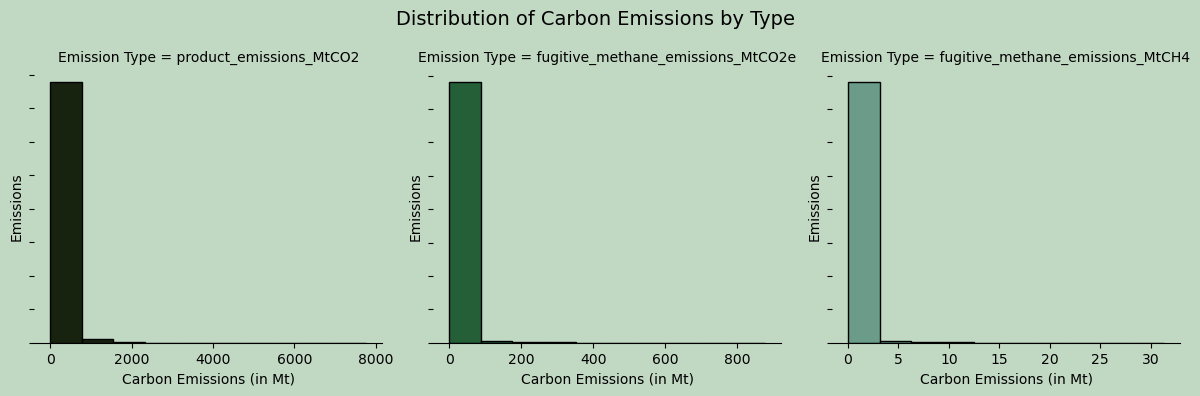

In [51]:
# Custom Color Hunt palette
custom_colors = ['#18230F', '#255F38','#6A9C89']

# Melt the DataFrame to long format
melted = carbon_emissions.melt(
    value_vars=[
        "product_emissions_MtCO2",
        "fugitive_methane_emissions_MtCO2e",
        "fugitive_methane_emissions_MtCH4"
    ],
    var_name="Emission Type",
    value_name="Value"
)

# Set up FacetGrid
g = sns.FacetGrid(data=melted, col="Emission Type", sharey=False, sharex=False, height=4, aspect=1)

# Plot manually with histogram (no data labels)
for i, ax in enumerate(g.axes.flat):
    emission_type = melted["Emission Type"].unique()[i]
    data_subset = melted[melted["Emission Type"] == emission_type]
    
    # Plot histogram manually
    ax.hist(
        data_subset["Value"],
        bins=10,
        color=custom_colors[i % len(custom_colors)],
        edgecolor='black'
    )

    # Set axis labels
    ax.set_xlabel("Carbon Emissions (in Mt)", fontsize=10)
    ax.set_ylabel("Emissions", fontsize=10)
    ax.tick_params(axis='y', labelleft=False)

    # Change subplot background color
    ax.set_facecolor('#C1D8C3')

    sns.despine(ax=ax, left=True)

# Change overall figure background color
g.fig.patch.set_facecolor('#C1D8C3')

# Add overall title
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of Carbon Emissions by Type", fontsize=14, color='black')

plt.tight_layout()
plt.savefig("carbon_emissions_distribution.jpg", format="jpeg", dpi=300)
plt.show()


# **Distribution of Carbon Emissions by Type**
The plot is divided into three subplots, each representing a different emission type namely Product Emissions (MtCO2),  Fugitive Methane Emissions (MtCO2e) and Fugitive Methane Emissions (MtCH4)

**Key Findings**
1. **Product Emissions (MTCO2)**: Extremely high emissions levels observed (up to ~9000 MtCO2). Most records are clustered at the lower end, but there are significant high-emission entries that dominate the scale. This category clearly contributes the largest share to total emissions — likely from direct production activities (e.g., fuel combustion, industrial production).Product emissions dominate total carbon output by an order of magnitude, highlighting the need to prioritize operational efficiency in production.

2. **Fugitive Methane Emissions (MTCO2e):** Ranges Up to ~900 MtCO2e (converted methane equivalent). Also shows a right-skewed distribution — most values are clustered toward the lower end, but a few large outliers exist. Fugitive emissions often result from leaks or unintended releases (common in oil & gas sectors).

3. **Fugitive Methane Emissions (MTCH4):** Much lower scale compared to others — maxing at ~25 MtCH4. Shows a steep drop-off, indicating most sources are relatively low in volume. Since CH₄ is a highly potent greenhouse gas, even small volumes can have a major climate impact.

Fugitive emissions, though smaller in volume, are still significant and must be addressed for comprehensive carbon mitigation — particularly methane, due to its GWP (Global Warming Potential). The distributions are heavily right-skewed: a small subset of records contribute disproportionately to total emissions — these could be targeted for policy intervention or emissions capture.

**Recommendations**
1. **Prioritize Product Emission Mitigation:** Focus on process efficiency, fuel switching, and carbon capture in manufacturing and power generation.

2. **Methane Management Programs:** Fugitive methane leaks can be minimized through improved monitoring, infrastructure maintenance, and sealant tech.

*NB:Quantify Contribution Ratios:Calculate what % each emission type contributes to the total carbon footprint — allows prioritization.
 Overlay Emission Sources:Cross-reference emission types with industry sectors or company parent types for deeper targeting*

C:\Users\Dell\AppData\Local\Temp\ipykernel_25996\791216886.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variance_stats = carbon_emissions.groupby("parent_type")["total_operational_emissions_MtCO2e"].agg(
C:\Users\Dell\AppData\Local\Temp\ipykernel_25996\791216886.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Emission Spread by Parent Type:
                             mean        std    median       min         max  \
parent_type                                                                    
Investor-owned Company   5.644667   9.551284  2.236836  0.000000   93.472230   
Nation State            25.724788  75.722295  5.085370  0.000000  877.683714   
State-owned Entity      14.544719  37.379694  4.311067  0.000086  453.478237   

                        count        IQR  
parent_type                               
Investor-owned Company   9666   5.701019  
Nation State             2054  15.076560  
State-owned Entity       4077  13.805767  


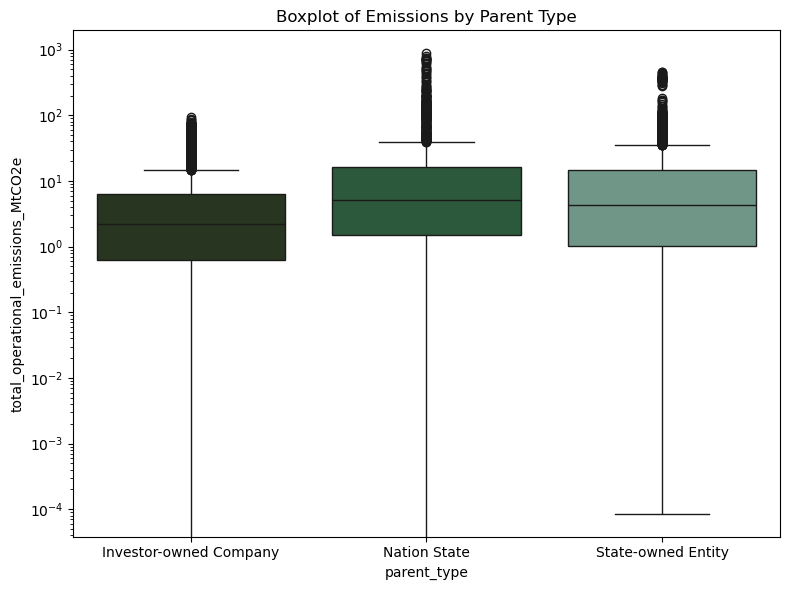

In [53]:
variance_stats = carbon_emissions.groupby("parent_type")["total_operational_emissions_MtCO2e"].agg(
    ["mean", "std", "median", "min", "max", "count", lambda x: x.quantile(0.75) - x.quantile(0.25)]
).rename(columns={"<lambda_0>": "IQR"})

print("Emission Spread by Parent Type:")
print(variance_stats)

# Optional: Visualize variance
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=carbon_emissions, 
    x="parent_type", 
    y="total_operational_emissions_MtCO2e", 
    palette=['#27391C', '#255F38','#6A9C89']
)
plt.yscale("log")
plt.title("Boxplot of Emissions by Parent Type")
plt.tight_layout()
plt.show()

### **Product Emissions per Record by Parent Type (Log Scale)**
A boxplot comparing total emission records emissions from operations per company or facility in metric tons of CO₂ equivalent (MtCO₂e) across the three parent type. The Y-axis is on a log scale, meaning each tick represents an exponential jump (from 10⁻⁴ to 10³). The boxplot helps show distribution, median, spread, and outliers for each parent type's total operations emissions.

**Key Findings:**
1. **All Parent Types Have High Variance in Emissions:** All three categories show wide vertical ranges, indicating substantial variability in emissions among entities.Suggests inconsistency in emissions intensity even within the same ownership structure.

2. **Investor-Owned Companies Show Slightly Higher Median Emissions:** The median line in the investor-owned category is slightly above the others — indicating these companies may have higher emissions per facility on average.

3. **Outliers Are Common in All Categories:** Numerous high-emission outliers in all parent types, especially Nation State and State-owned Entity groups, potentially reflecting mega-projects or centralized infrastructure (e.g., power plants, mining operations).


**Recommendations:**
1. **Flag and Investigate High Outliers:** Pinpoint entities in the upper emission outlier group for targeted mitigation (e.g., carbon capture, renewable transition incentives).

2. **Further Normalize Data:** Normalize emissions by production capacity or revenue to compare emissions efficiency across ownership types.

3. **Policy Tailoring by Ownership Type:**

    Investor-owned: Incentivize greener practices via ESG scoring.

    State-owned: Mandate emissions caps.

    Nation-states: Integrate emissions into national budgets and SDG tracking.

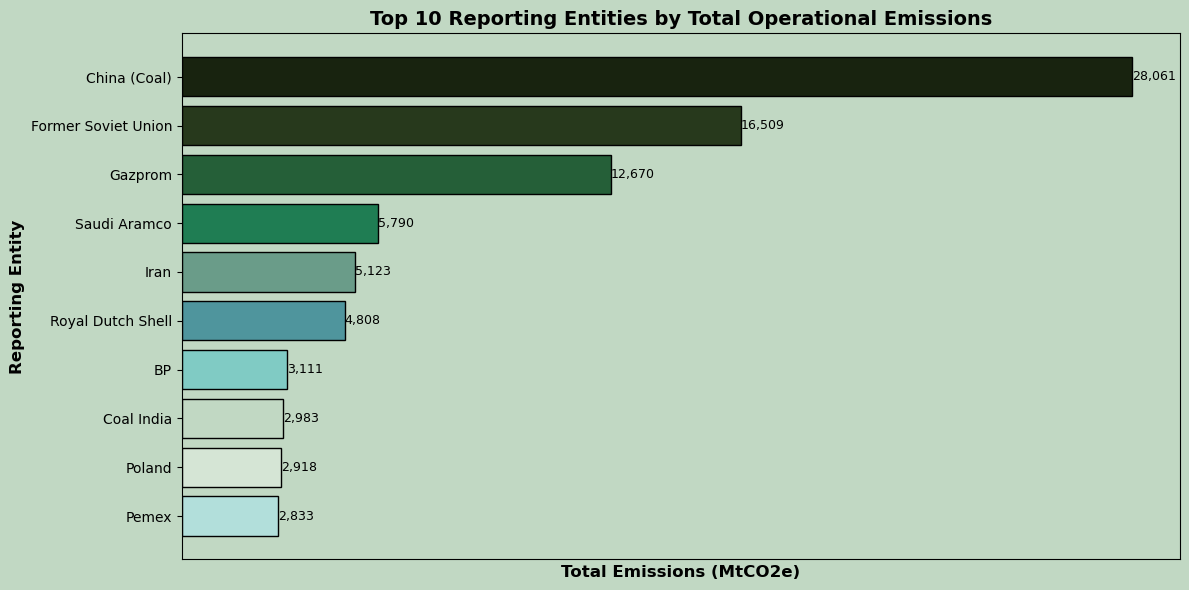

In [55]:
import matplotlib.pyplot as plt

# Group by reporting_entity and calculate total operational emissions, sorted in descending order
top10_entities = (
    carbon_emissions.groupby("reporting_entity")["total_operational_emissions_MtCO2e"]
    .sum()
    .sort_values(ascending=True)  # Keeps the visual descending top-to-bottom
    .tail(10)
)

# Define reversed custom color palette
colors = ['#18230F', '#27391C', '#255F38', '#1F7D53', '#6A9C89',
          '#4F959D', '#80CBC4', '#C1D8C3', '#D5E5D5', '#B2DFDB'][::-1]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#C1D8C3')
ax.set_facecolor('#C1D8C3')

# Generate horizontal bar chart
bars = ax.barh(top10_entities.index, top10_entities.values, color=colors, edgecolor='black')

# Bold title and labels
plt.title("Top 10 Reporting Entities by Total Operational Emissions", fontsize=14, fontweight='bold')
plt.xlabel("Total Emissions (MtCO2e)", fontsize=12, fontweight='bold')
plt.ylabel("Reporting Entity", fontsize=12, fontweight='bold')

# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Add data labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:,.0f}', ha='left', va='center', fontsize=9)

plt.tight_layout()

# Save as JPEG
plt.savefig("top10_reporting_entities_emissions.jpg", format='jpg', dpi=300)

plt.show()


# **Top 10 Reporting Entities by Operational Emissions**

**Overview:** This visualization ranks the top 10 entities with the highest operational emissions globally (in MtCO₂e). Individual companies, not grouped by country or continent, are ranked based on cumulative emissions.

**Key Findings**

1. **Disproportionate Share:** A small number of entities contribute a significant portion of global emissions, reflecting findings from the Carbon Majors Report (2017) which stated: *"100 companies account for over 70% of emissions since 1988."*
2. **Fossil Fuel Dominance:** Major oil & gas firms, state-owned coal producers, and large extractive industries dominate the rankings, operating over decades often with limited oversight.
3. **Systemic Emission Patterns:** While the top emitter leads significantly, ranks 2–10 show less variation, indicating systemic issues across industries.


**Recommendations**

- **Policy Focus:** Target top emitters with carbon taxes, trading schemes, regulatory caps, and mandatory sustainability reporting.
- **Accountability:** Use public dashboards, investor scrutiny, and litigation to track and enforce progress.
- **Decarbonization Plans:** Place top entities at the forefront of net-zero frameworks, integrating emission reductions into market access and financial ratings.
- **Encourage Green Finance:** Governments and investors should promote ESG-focused portfolios and green alternatives.

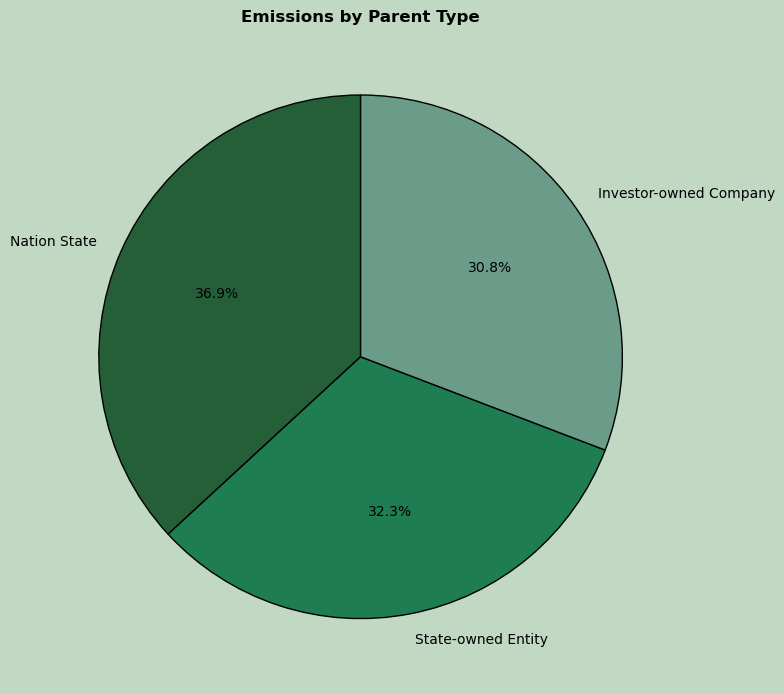

In [57]:
import matplotlib.pyplot as plt

# Define custom color palette from Color Hunt
custom_colors = ['#255F38', '#1F7D53', '#6A9C89']

# Set figure and axes background color
fig, ax = plt.subplots(figsize=(8, 8), facecolor='#C1D8C3')
fig.patch.set_facecolor('#C1D8C3')
ax.set_facecolor('#C1D8C3')

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    parent_type_emissions["Total Emissions"],
    labels=parent_type_emissions.index,
    autopct='%.1f%%',
    colors=custom_colors[:len(parent_type_emissions)],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

# Bolden title
plt.title("Emissions by Parent Type", fontweight='bold')

# Improve text visibility
for text in texts + autotexts:
    text.set_fontsize(10)

plt.tight_layout()

# Save as JPEG
plt.savefig("emissions_by_parent_type.jpg", format='jpg', dpi=300)

plt.show()


### **Emissions by Parent Type**
The pie chart is illustrating Total Emissions by Parent Type, showing the share of emissions from Nation States, State-owned Entities and Investor-owned Companies

**Key Findings**
1. **Almost Equal Responsibility:** The emissions are fairly evenly distributed across the three parent types, each contributing roughly one-third of the total.This indicates that accountability for emissions is spread across both public and private sectors.
   
2. **Public Sector Dominance:** Combining Nation State (36.9%) and State-owned Entities (32.3%) yields 69.2% — over two-thirds of global emissions come from state-involved structures.This emphasizes the crucial role of governments in decarbonization strategies.

3. **Investor-owned Companies Still Key Players:** Contributing nearly one-third, these are typically multinational oil & gas companies, utilities, and manufacturers.Highlights the need for private sector ESG policies and clean innovation.

**Recommendations**
1. **Policy and Regulation Leverage:** Since 69.2% of emissions are state-linked, climate policies, carbon taxes, and enforcement mechanisms at the government level could rapidly influence large-scale change.
2. **Corporate Climate Accountability:** Investor-owned firms must be subject to public pressure, climate disclosures (like TCFD), ESG benchmarks, and green innovation incentives.
3. **State-Owned Reforms:** State entities should be restructured or incentivized to modernize toward low-carbon models. Transparency and decarbonization targets are vital.
4. **Global Cooperation Models:** This data underlines the multilateral responsibility — emissions reductions need to happen across public and private sectors globally.

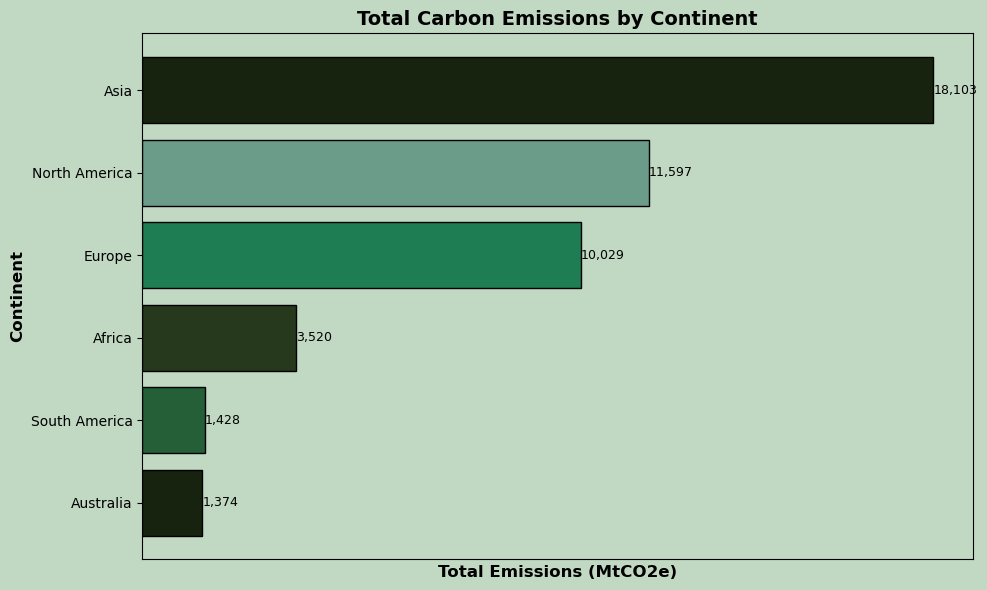

In [59]:
# Grouping by continent and summing total emissions, sorted in descending order
continent_emissions = carbon_emissions.groupby("continent")["total_operational_emissions_MtCO2e"] \
    .sum().sort_values(ascending=False)

# Plotting the horizontal bar chart (reversed so highest emissions appear on top)
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#C1D8C3')  # Figure background
ax.set_facecolor('#C1D8C3')         # Axes background

bars = ax.barh(continent_emissions.index[::-1], continent_emissions.values[::-1],
               color=['#18230F', '#255F38', '#27391C', '#1F7D53', '#6A9C89'],
               edgecolor='black')

# Customizing the chart''#27391C',
ax.set_title("Total Carbon Emissions by Continent", fontsize=14, fontweight='bold')
ax.set_xlabel("Total Emissions (MtCO2e)", fontsize=12, fontweight='bold')
ax.set_ylabel("Continent", fontsize=12, fontweight='bold')

# Remove X-axis values (ticks and labels)
ax.set_xticks([])
ax.set_xticklabels([])

# Add data labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:,.0f}', ha='left', va='center', fontsize=9)

plt.tight_layout()

# Save as JPEG
plt.savefig('continent_emissions.jpg', format='jpg', dpi=300)

plt.show()


## **Total Emissions by Continent**
**Key Insights**
- **Asia:** Leads global emissions, significantly outpacing other continents due to large-scale manufacturing operations.
- **North America & Europe:** The second and third largest emitters, driven by industrial and corporate activities like data centers and headquarters.
- **Africa, South America, and Australia:** Lower emissions linked to fewer industrial activities and reduced energy consumption per capita.

**Recommendations**
1. **Focus on High-Emission Regions:** Target reduction strategies for Asia, North America, and Europe.
   - Asia: Enhance manufacturing and supply chain efficiency.
   - North America & Europe: Boost energy efficiency in corporate sectors.
2. **Relocate Operations:** Decentralize supply chains to lower-emission regions while investing in green infrastructure.
3. **Accountability & Monitoring:** Implement Scope 3 emissions tracking, ESG transparency, and sustainability benchmarks.
4. **Invest in Green Initiatives:** Promote clean technology and carbon offset projects globally.
5. **Corporate Audits & Incentives:** Conduct emissions audits to set reduction benchmarks and incentivize compliance.
6. **Advocate for Policies:** Collaborate with governments on carbon pricing, regulation, and R&D for sustainable solutions.

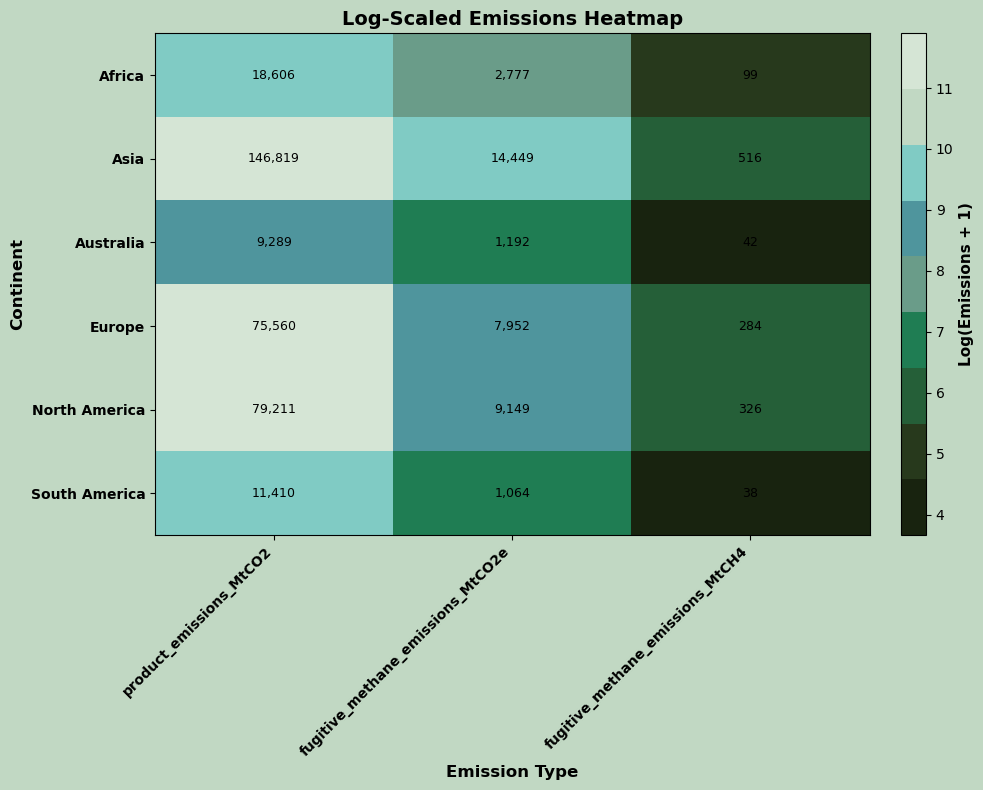

In [61]:
from matplotlib.colors import ListedColormap

# Step 1: Group by continent and sum emissions
emission_columns = [
    "product_emissions_MtCO2",
    "fugitive_methane_emissions_MtCO2e",
    "fugitive_methane_emissions_MtCH4"
]
continent_emissions = carbon_emissions.groupby('continent')[emission_columns].sum()
log_emissions = continent_emissions.apply(np.log1p)

# Step 2: Custom colormap
custom_colors = ['#18230F', '#27391C', '#255F38', '#1F7D53', '#6A9C89', '#4F959D', '#80CBC4', '#C1D8C3', '#D5E5D5']
cmap = ListedColormap(custom_colors)

# Step 3: Set up single heatmap subplot
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#C1D8C3')  # Figure background
ax.set_facecolor('#C1D8C3')         # Axes background

# ---- HEATMAP ----
im = ax.imshow(log_emissions, aspect='auto', cmap=cmap)

# Add data labels to heatmap
for i in range(log_emissions.shape[0]):
    for j in range(log_emissions.shape[1]):
        original = continent_emissions.iloc[i, j]
        ax.text(j, i, f"{int(original):,}", ha='center', va='center', fontsize=9, color='black')

# Heatmap formatting
ax.set_xticks(np.arange(len(emission_columns)))
ax.set_xticklabels(emission_columns, rotation=45, ha='right', fontweight='bold')
ax.set_yticks(np.arange(len(continent_emissions.index)))
ax.set_yticklabels(continent_emissions.index, fontweight='bold')

ax.set_title('Log-Scaled Emissions Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Emission Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Continent', fontsize=12, fontweight='bold')

# Add color bar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Log(Emissions + 1)', fontsize=11, fontweight='bold')

plt.tight_layout()

# Save as JPEG
plt.savefig('log_scaled_emissions_heatmap.jpg', format='jpg', dpi=300)

plt.show()


**Description**
This heatmap visualizes total emissions by continent, broken down by three emission types: product CO₂, fugitive methane (MtCO₂e), and fugitive methane (MtCH₄).

**Key Insights from the Visual:** 

1. Asia and North America display the darkest shades, indicating the highest emissions, particularly in product CO₂ emissions. These continents display consistently higher emissions across all emission types, especially in product and fugitive methane emissions, due to large industrial operations and fossil fuel dependency.

2. Africa, Oceania, and South America show comparatively lighter hues, suggesting lower overall emissions across all types.Europe shows a moderate emission intensity, especially in fugitive methane categories.
   
3. The stark contrast in colors across continents emphasizes the disproportionate contributions to global emissions. Asia's high emissions could be due to the presence of large industrial emitters and fossil fuel-dependent economies.The use of log-scaled intensity helps reveal outliers and hidden variance more clearly, especially in fugitive methane. Notably, some continents show disproportionately high methane flaring, as seen in South America and Central Asia, highlighting inefficiencies in energy extraction or regulation.**

**Recommendations**
- **Regional Strategies:** Tailor approaches to local challenges—like decarbonizing industry in Asia, sustainable agriculture in Africa, protecting ecosystems in Oceania and South America, and advancing green energy in Europe.
- **Methane Action:** Reduce methane emissions with leak detection in oil/gas fields and incentivizing capture in farms and landfills.
- **Data-Driven Policies:** Set continent-specific emission quotas and focus on reducing specific greenhouse gases.
- **Monitoring Systems:** Use advanced technology like satellites and IoT sensors for real-time emissions tracking and mitigation.

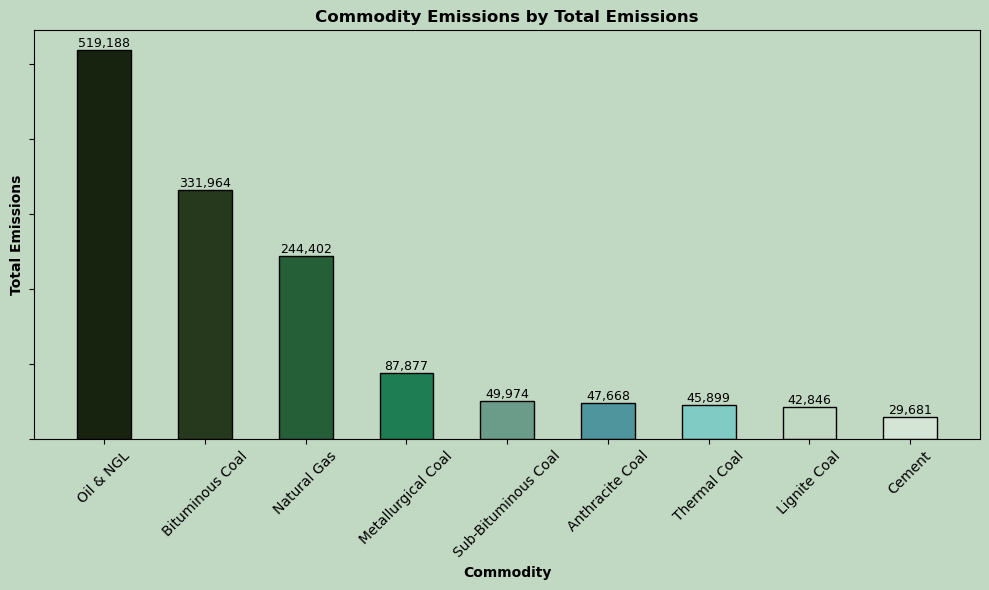

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x positions with spacing
x = np.arange(len(commodity_emissions)) * 1.5  # spacing factor

# Set up the figure with background color
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#C1D8C3')
ax.set_facecolor('#C1D8C3')

# Bar chart
bars = ax.bar(
    x,
    commodity_emissions["Total Emissions"],
    color=['#18230F', '#27391C', '#255F38', '#1F7D53', '#6A9C89',
           '#4F959D', '#80CBC4', '#C1D8C3', '#D5E5D5'],
    edgecolor='black'
)

# Data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{int(height):,}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Bold titles and labels
plt.title("Commodity Emissions by Total Emissions", fontweight='bold')
plt.xlabel("Commodity", fontweight='bold')
plt.ylabel("Total Emissions", fontweight='bold')

# Remove y-axis tick labels
ax.tick_params(axis='y', labelleft=False)

# Set x-axis labels
plt.xticks(x, commodity_emissions.index, rotation=45)

plt.tight_layout()

# Save as JPEG
plt.savefig("commodity_emissions.jpg", format='jpg', dpi=300)

plt.show()


### **Commodity Emissions by Total Emissions Analysis**
This is a comparative bar chart showing emissions quantities per energy commodity type. The X- axis list the various commodity types while the y-axis represent the emissions output in a numeric scale (likely in metric tons or similar).

**Key Insights**
1. **Fossil Fuels Dominate:** The top 3 commodities (Oil & NGL, Bituminous Coal, and Natural Gas) are all fossil fuels. Combined, they account for the overwhelming majority of total emissions in this visual.
2. **Coal Categories (Diverse Yet Impactful):** Coal is represented in multiple forms, each contributing differently. Despite some forms like lignite having smaller values, collectively, coal remains a significant emissions source.
3. **Natural Gas’s Position:** Though touted as cleaner, it still ranks 3rd, showing its significant but slightly cleaner impact compared to coal.
4. **Cement’s Inclusion:** Even though it's not a fuel, cement's production processes contribute notably via process and energy emissions.

**Recommendations**
1. **Prioritize Clean Transitions:** Phasing out Oil & NGL and Bituminous Coal offers the most impactful reduction. Incentivize renewables like solar, wind, and green hydrogen for sectors relying on high-emission fuels.
2. **Natural Gas: Bridge or Burden?:** While cleaner than coal, natural gas still needs eventual phasing out in favor of low-carbon solutions.
3. **Industrial Shifts Needed:** Cement and Metallurgical Coal indicate the need for innovation in industrial processes, such as carbon capture.
4. **Coal Phase-Out Strategy:** A multi-phase strategy across coal types can yield significant climate wins, especially in power and steel sectors.


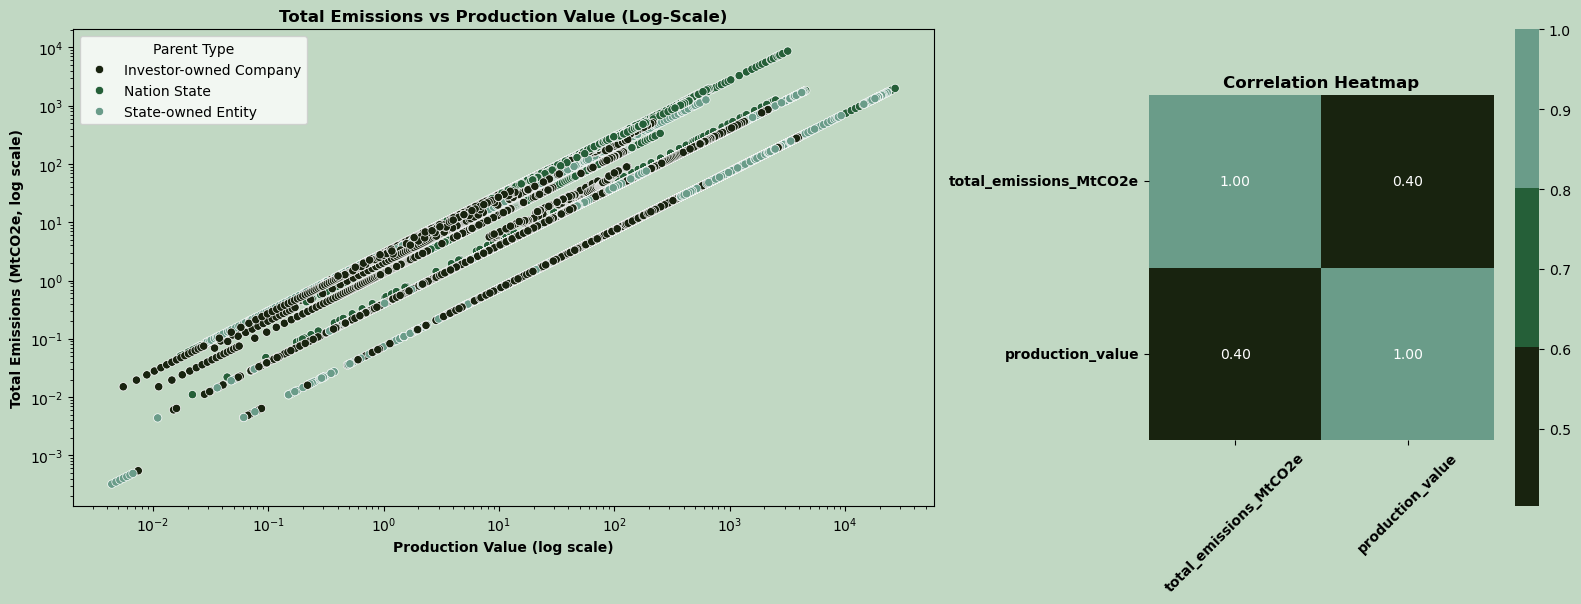

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#18230F', '#255F38', '#6A9C89']

# Create side-by-side subplots with background color
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]}, facecolor='#C1D8C3')
ax1.set_facecolor('#C1D8C3')
ax2.set_facecolor('#C1D8C3')

# --- Scatter Plot: Emissions vs Revenue ---
sns.scatterplot(
    data=carbon_emissions,
    x="production_value",
    y="total_emissions_MtCO2e",
    hue="parent_type",
    palette=custom_palette,
    ax=ax1
)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Total Emissions vs Production Value (Log-Scale)", fontweight='bold')
ax1.set_xlabel("Production Value (log scale)", fontweight='bold')
ax1.set_ylabel("Total Emissions (MtCO2e, log scale)", fontweight='bold')
ax1.legend(title="Parent Type", loc="best")

# --- Correlation Heatmap ---
corr_matrix = carbon_emissions[["total_emissions_MtCO2e", "production_value"]].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=sns.color_palette(custom_palette),
    fmt=".2f",
    cbar=True,
    square=True,
    ax=ax2
)
ax2.set_title("Correlation Heatmap", fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontweight='bold')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontweight='bold')

plt.tight_layout()

# Save as JPEG
plt.savefig("emissions_vs_revenue_correlation.jpg", format='jpg', dpi=300)

plt.show()


# **Emissions vs Revenue (Production Value)**

**Key Insights Extracted**
1. **Positive Correlation Detected**: The plotted points for all parent types show a clear linear trend on the log-log scale, which implies a power-law or exponential-type relationship — i.e., as production value increases, emissions increase proportionally.
   
2. **Consistency Across Ownership Types**: Investor-owned companies, nation-states, and state-owned entities follow a similar pattern, although slight deviations are visible — suggesting that emission intensity per unit of production may differ slightly across ownership types.

3. **Low-Production Outliers**: A few low-production, low-emission entities exist (visible in the bottom-left), mostly state-owned entities, which could indicate inefficiencies or under-reporting.


**Recommendations**
1. **Normalize Emissions by Production Value:**: Conduct a follow-up analysis using emissions per dollar/unit of production to evaluate carbon efficiency across parent types
  
2. **Identify High Emitters per Production Unit:**: Highlight entities with high emissions but low production value — likely inefficient or polluting actors worth policy intervention.

3. **Introduce Weighted Carbon Taxation**: Complement this chart with analysis by commodity, country, and source type (e.g., flaring, fugitive methane) to inform more precise policy interventions.

4. **Model Emission Peaks and Policy Shifts**: Overlay major climate agreements, regulatory actions, or energy crises onto the timeline to understand real-world triggers behind emission slowdowns or spikes.

C:\Users\Dell\AppData\Local\Temp\ipykernel_25996\2468738383.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commodity_revenue = carbon_emissions.groupby("commodity")["production_value"].sum().sort_values(ascending=True)


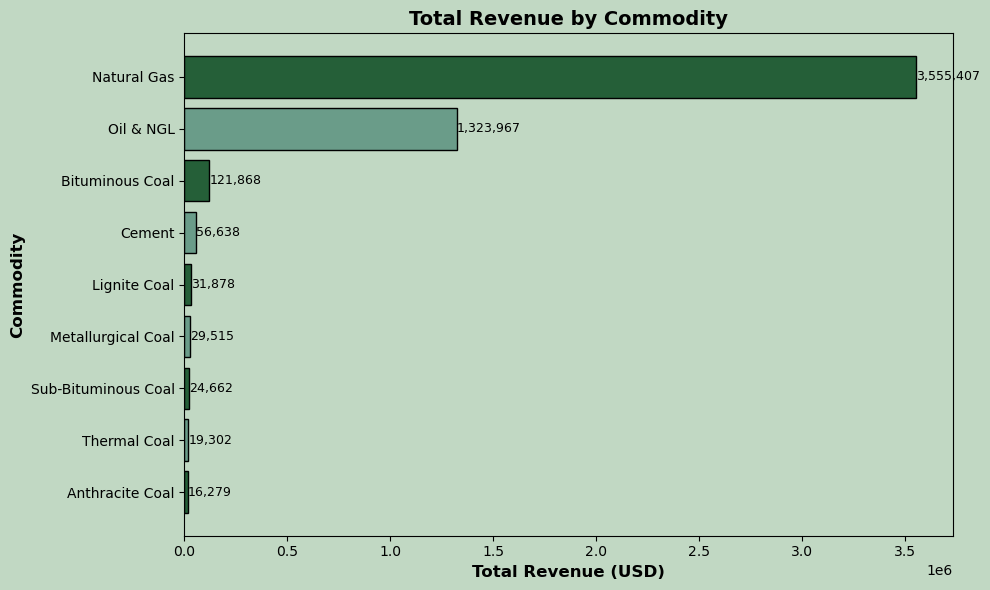

In [67]:
import matplotlib.pyplot as plt

# Group and sort total revenue by commodity
commodity_revenue = carbon_emissions.groupby("commodity")["production_value"].sum().sort_values(ascending=True)

# Set alternating colors
colors = ['#255F38' if i % 2 == 0 else '#6A9C89' for i in range(len(commodity_revenue))]

# Create the horizontal bar chart with background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#C1D8C3')
ax.set_facecolor('#C1D8C3')

bars = ax.barh(commodity_revenue.index, commodity_revenue.values, color=colors, edgecolor='black')

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.0, f'{width:,.0f}', ha='left', va='center', fontsize=9)

# Formatting with bold titles and labels
ax.set_title("Total Revenue by Commodity", fontsize=14, fontweight='bold')
ax.set_xlabel("Total Revenue (USD)", fontsize=12, fontweight='bold')
ax.set_ylabel("Commodity", fontsize=12, fontweight='bold')

plt.tight_layout()

# Save as JPEG
plt.savefig("revenue_by_commodity.jpg", format='jpg', dpi=300)

plt.show()


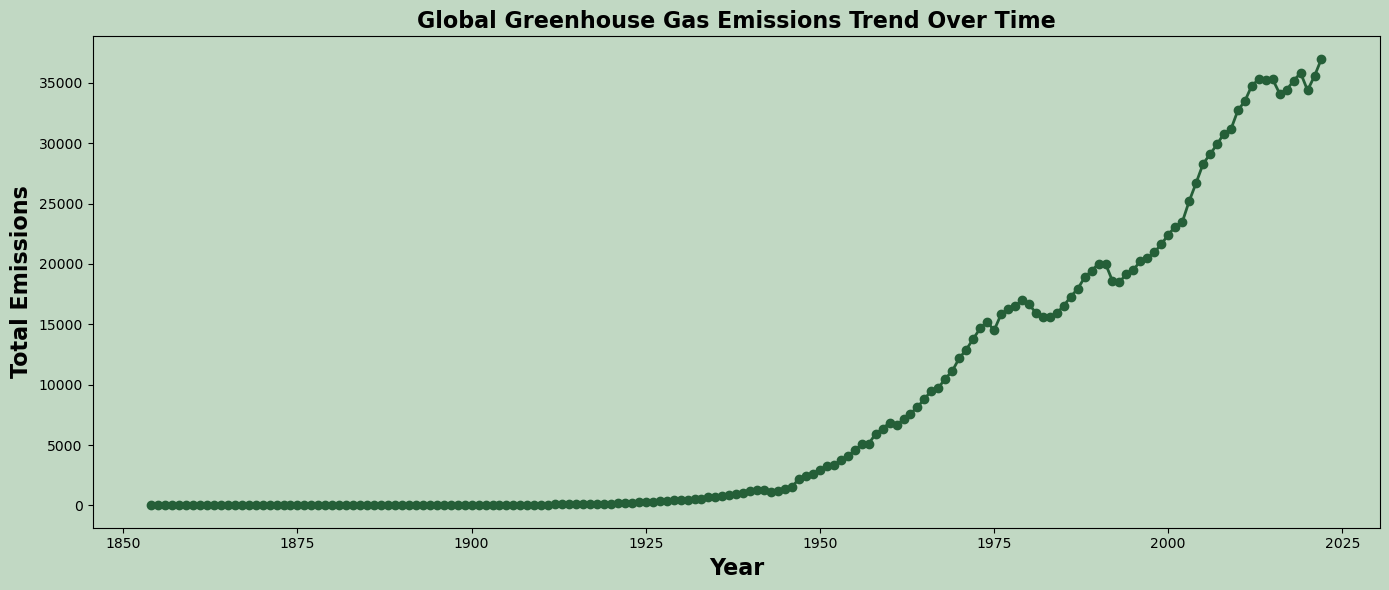

In [68]:
# Visualizing global emissions over time
# Ensure the 'year' column is in numeric format
carbon_emissions['year'] = pd.to_numeric(carbon_emissions['year'], errors='coerce')

# Group data by year and sum all emission sources
yearly_emissions = carbon_emissions.groupby('year')[[
    "product_emissions_MtCO2", "fugitive_methane_emissions_MtCO2e", "fugitive_methane_emissions_MtCH4"
]].sum()

# Create a new column for total emissions per year
yearly_emissions['Total Emissions'] = yearly_emissions.sum(axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#C1D8C3')     # Set the figure background color
ax.set_facecolor('#C1D8C3')            # Set the axes background color

ax.plot(yearly_emissions.index, yearly_emissions['Total Emissions'],
        color='#255F38', marker='o', linewidth=2)

# Customizing the chart
ax.set_title('Global Greenhouse Gas Emissions Trend Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Total Emissions', fontsize=16, fontweight='bold')

plt.tight_layout()

# Save the figure as a JPEG image
plt.savefig('global_emissions_trend.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


### Global Trend Analysis
Visualizes the total greenhouse gas (GHG) emissions globally over the past ~170 years, from 1850 to 2025 (projected).

**Key Findings**
1. **Long Period of Stability (1850–1950)**: Emissions remained almost flat for a century.This aligns with the pre-industrial and early-industrial era where Global industrial activity was low, Fossil fuel use (especially oil and gas) was not yet dominant and global population and economic output was limited. The climate impact in this period was relatively minimal due to low human industrial activity.*

2. **Post-War Boom & Rapid Acceleration (1950–1990)**: Around 1950, there is a sharp and continuous upward curve.The slope increases steadily, indicating massive industrialization post-WWII, increased use of coal, oil, and gas and the rise of automobiles, global trade, and population growth. This era marks the "Great Acceleration" — a sharp rise in anthropogenic GHG emissions due to rapid economic development and globalization.*

3. **Fluctuations in Growth Rate (1990–2015)**: The curve continues upward but with visible bumps and plateaus. This may reflect Recessions, e.g., 2008 financial crisis, Global policy interventions or regional decarbonization and the Rise of renewables in certain regions vs. increased emissions from developing countries. This means that despite increased awareness and partial climate action, emissions still trend upward, indicating global policies have not yet curbed net emissions.*

4. **Stabilization Attempts (2015–2025)**: Some apparent flattening in the last segment. This could reflect COVID-19 pandemic dip (2020), Advances in green technologies and climate pledges yet emissions remain historically high, with no true reversal trend.This means that while temporary dips occur, long-term reduction has not yet been achieved. Further technological shifts and policy enforcement are necessary.*       

**Recommendations**
- **Corporate & Industrial Responsibility**  
  - Enforce carbon tracking and disclosures for high-emission industries.  
  - Incentivize adoption of clean technologies like renewables and carbon capture.  

- **Policy & Regulation**  
  - Support climate policies like carbon taxes, cap-and-trade systems, and renewable energy mandates.  
  - Set greenhouse gas (GHG) emission limits by sector and region.  

- **International Collaboration**  
  - Encourage leadership from major economies (China, U.S., EU) in global climate action.  
  - Expand climate funding for developing countries to adopt sustainable technologies.  

- **Transportation Sector Reform**  
  - Promote electric vehicles (EVs) and phase out internal combustion engines.  
  - Improve public transportation and urban planning to reduce car dependency.  

- **Consumer & Community Action**  
  - Educate the public on carbon footprints and sustainable lifestyle choices.  
  - Encourage energy-efficient appliances, solar panels, and recycling at home.  

C:\Users\Dell\AppData\Local\Temp\ipykernel_25996\4270566992.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emissions_trend = carbon_emissions.groupby(["year", "parent_type"])["total_operational_emissions_MtCO2e"].sum().reset_index()
C:\Users\Dell\AppData\Local\Temp\ipykernel_25996\4270566992.py:15: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(


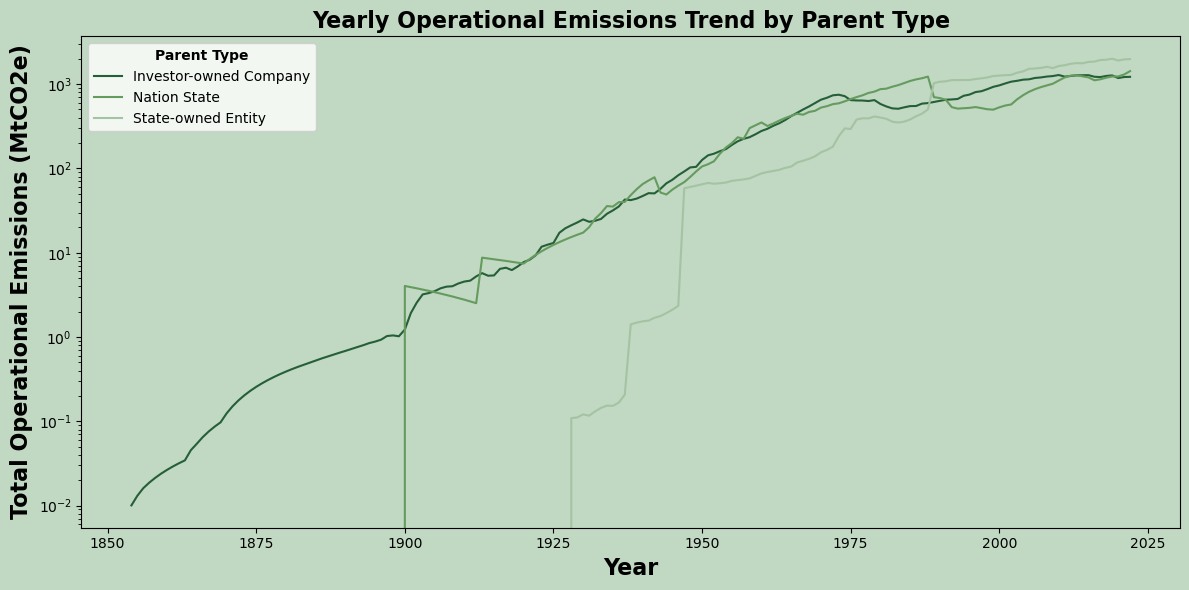

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example color palette (edit as needed)
custom_palette = ["#255F38", "#659B5E", "#A4C3A2", "#44693D"]

# Aggregate emissions per year per parent type
emissions_trend = carbon_emissions.groupby(["year", "parent_type"])["total_operational_emissions_MtCO2e"].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#C1D8C3')  # Figure background
ax.set_facecolor('#C1D8C3')         # Axes background

sns.lineplot(
    data=emissions_trend,
    x="year",
    y="total_operational_emissions_MtCO2e",
    hue="parent_type",
    palette=custom_palette,
    ax=ax
)

ax.set_yscale("log")

# Titles and labels with bold font
ax.set_title("Yearly Operational Emissions Trend by Parent Type", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=16, fontweight='bold')
ax.set_ylabel("Total Operational Emissions (MtCO2e)", fontsize=16, fontweight='bold')

# Legend title bold
legend = ax.get_legend()
legend.set_title("Parent Type", prop={'weight': 'bold'})

# Save the figure as a JPEG image
plt.savefig('emissions_trend.jpg', format='jpg', dpi=300)

plt.tight_layout()
plt.show()


# **Cumulative Operational Emissions by Parent Type (1850–2022)**
The chart presented in the image is a cumulative line graph plotting the total operational emissions (in MtCO₂e) over time (from 1850 to around 2022), grouped by parent type. The y-axis uses a logarithmic scale, which is important to note because it emphasizes relative growth rates more than absolute differences.

**Key Insights Extracted**
1. **Delayed Start for Some Parent Types**: Investor-owned companies began recording emissions earliest, already present by the mid-1800s.Nation states follow closely, with a relatively steep and steady increase.State-owned entities show delayed emissions records, with a noticeable onset around 1925. This might reflect historical changes in nationalization of industries or reporting standards.

2. **Exponential Growth Across All Groups**: Despite different starting points, all three categories show exponential growth in operational emissions — a hallmark of industrialization, fossil fuel dependency, and global economic expansion. The log scale confirms that emissions growth rates are similarly steep across the board, though state-owned entities had a more erratic growth pattern at first.

3. **Investor-owned Companies Lead Cumulative Emissions**: As of the most recent year, investor-owned companies appear to have slightly higher total cumulative operational emissions than the other two groups. Nation states are close behind, indicating heavy contributions from state-run industrial activities.

4. **Historical Data Gaps / Reporting Lags**: Early data gaps for nation states and state-owned entities (prior to 1900) may reflect either a lack of industrial activity or more likely, incomplete historical data/reporting.

**Recommendations**
1. **Prioritize Investor-Owned Emission Reduction**: Since they have the highest cumulative emissions and potentially more flexibility, policies such as carbon pricing, mandatory disclosure, and green investment incentives should target this group.
  
2. **Address Historical Data Gaps for State-owned Entities**: Encourage transparent, complete historical emissions reporting for national and state-owned enterprises. This improves data accuracy for climate modeling.

3. **Disaggregate Data Further**: Complement this chart with analysis by commodity, country, and source type (e.g., flaring, fugitive methane) to inform more precise policy interventions.

4. **Model Emission Peaks and Policy Shifts**: Overlay major climate agreements, regulatory actions, or energy crises onto the timeline to understand real-world triggers behind emission slowdowns or spikes.

# **MACHINE LEARNING**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [74]:
carbon_emissions.head()

year                   parent_entity         parent_type reporting_entity  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
1  1963  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
2  1964  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
3  1965  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
4  1966  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   

   commodity  production_value production_unit  product_emissions_MtCO2  \
0  Oil & NGL            0.9125  Million bbl/yr                 0.338928   
1  Oil & NGL            1.8250  Million bbl/yr                 0.677855   
2  Oil & NGL            7.3000  Million bbl/yr                 2.711422   
3  Oil & NGL           10.9500  Million bbl/yr                 4.067132   
4  Oil & NGL           13.5050  Million bbl/yr                 5.016130   

   fugitive_methane_emissions_MtCO2e  fugitive_methane_emissions_MtCH4  \
0                           0.018254                          0.000652   
1                           0.036508                          0.001304   
2                           0.146033                          0.005215   
3                           0.219049                          0.007823   
4                           0.270160                          0.009649   

   total_operational_emissions_MtCO2e  total_emissions_MtCO2e continent  
0                            0.024957                0.363885      Asia  
1                            0.049914                0.727770      Asia  
2                            0.199657                2.911079      Asia  
3                            0.299486                4.366618      Asia  
4                            0.369366                5.385495      Asia

In [75]:
carbon_emissions.dtypes

year                                     int64
parent_entity                         category
parent_type                           category
reporting_entity                        object
commodity                             category
production_value                       float64
production_unit                       category
product_emissions_MtCO2                float64
fugitive_methane_emissions_MtCO2e      float64
fugitive_methane_emissions_MtCH4       float64
total_operational_emissions_MtCO2e     float64
total_emissions_MtCO2e                 float64
continent                               object
dtype: object

In [76]:
# Drop sparse or irrelevant columns
carbon_emissions.drop(['parent_type', 'reporting_entity', 'parent_entity', 'continent', 'commodity', 'production_unit'], axis=1, inplace=True, errors='ignore')

# Fill numeric NaNs with column mean
carbon_emissions.fillna(carbon_emissions.mean(numeric_only=True), inplace=True)

# Fill missing categorical columns with mode and encode
label_encoders = {}
for col in carbon_emissions.select_dtypes(include='object').columns:
    carbon_emissions[col].fillna(carbon_emissions[col].mode()[0], inplace=True)
    le = LabelEncoder()
    carbon_emissions[col] = le.fit_transform(carbon_emissions[col])
    label_encoders[col] = le

In [77]:
X = carbon_emissions.drop('total_emissions_MtCO2e', axis=1)
y = carbon_emissions['total_emissions_MtCO2e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
X 

year  production_value  product_emissions_MtCO2  \
0      1962            0.9125                 0.338928   
1      1963            1.8250                 0.677855   
2      1964            7.3000                 2.711422   
3      1965           10.9500                 4.067132   
4      1966           13.5050                 5.016130   
...     ...               ...                      ...   
15792  2020          394.0000                21.052898   
15793  2021           90.0000                33.428485   
15794  2021          403.0000                21.533801   
15795  2022           98.0000                36.399906   
15796  2022          423.0000                22.602476   

       fugitive_methane_emissions_MtCO2e  fugitive_methane_emissions_MtCH4  \
0                               0.018254                          0.000652   
1                               0.036508                          0.001304   
2                               0.146033                          0.005215   
3                               0.219049                          0.007823   
4                               0.270160                          0.009649   
...                                  ...                               ...   
15792                           5.823079                          0.207967   
15793                           1.800403                          0.064300   
15794                           5.956093                          0.212718   
15795                           1.960438                          0.070016   
15796                           6.251681                          0.223274   

       total_operational_emissions_MtCO2e  
0                                0.024957  
1                                0.049914  
2                                0.199657  
3                                0.299486  
4                                0.369366  
...                                   ...  
15792                            7.665916  
15793                            2.461525  
15794                            7.841026  
15795                            2.680328  
15796                            8.230159  

[15797 rows x 6 columns]

In [79]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Random Forest R² Score: 0.9985
Random Forest RMSE: 8.9179

KNN R² Score: 0.9989
KNN RMSE: 7.7487



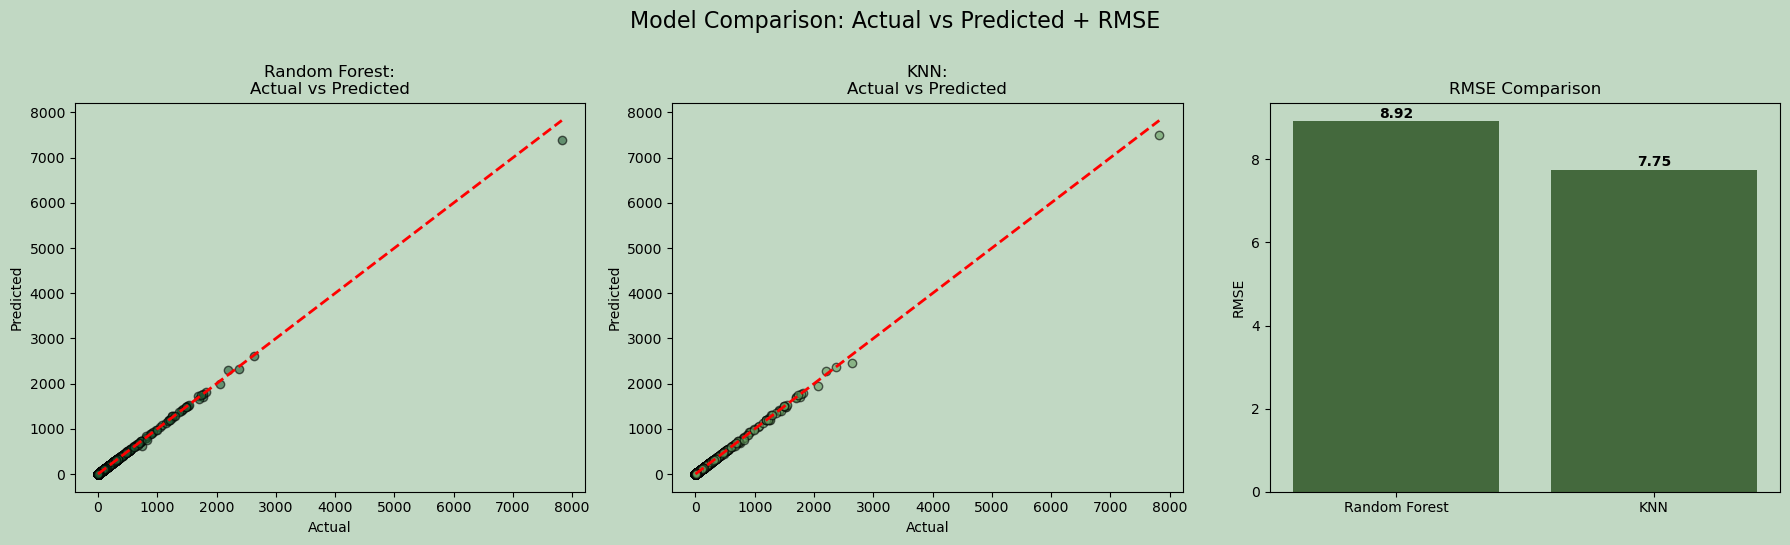

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the custom color palette
custom_palette = ["#255F38", "#659B5E", "#A4C3A2", "#44693D"]
bg_color = "#C1D8C3"  # Background color

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions for Random Forest and KNN only
rf_preds = rf_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# Evaluate the models
models = ['Random Forest', 'KNN']
preds = [rf_preds, knn_preds]
r2_scores = [r2_score(y_test, p) for p in preds]
rmses = [np.sqrt(mean_squared_error(y_test, p)) for p in preds]

# Print metrics
for i, model in enumerate(models):
    print(f"{model} R² Score: {r2_scores[i]:.4f}")
    print(f"{model} RMSE: {rmses[i]:.4f}\n")

# ---- 🧩 All Visualizations in One Row ---- #
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.patch.set_facecolor(bg_color)  # Set figure background

# Plot Actual vs Predicted for Random Forest
axs[0].scatter(y_test, rf_preds, alpha=0.6, edgecolors='k', color=custom_palette[0])
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[0].set_title('Random Forest:\nActual vs Predicted')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_facecolor(bg_color)

# Plot Actual vs Predicted for KNN
axs[1].scatter(y_test, knn_preds, alpha=0.6, edgecolors='k', color=custom_palette[1])
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[1].set_title('KNN:\nActual vs Predicted')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_facecolor(bg_color)

# Plot RMSE Comparison
bars = axs[2].bar(models, rmses, color=custom_palette[3])
axs[2].set_title("RMSE Comparison")
axs[2].set_ylabel("RMSE")
axs[2].set_facecolor(bg_color)

# Add data labels to RMSE bars
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle("Model Comparison: Actual vs Predicted + RMSE", fontsize=16, y=1.08)

# 🔻 Save the figure before showing it
plt.savefig("model_comparison_visual.png", dpi=300, bbox_inches='tight')

plt.show()


In [155]:
plt.savefig("Model Comparison: Actual vs Predicted + RMSE.jpeg", format='jpeg')


<Figure size 640x480 with 0 Axes>

In [81]:
# Simulate conditions for 2030
recent_data = carbon_emissions[carbon_emissions['year'] >= 2015].drop('total_emissions_MtCO2e', axis=1)
avg_features = recent_data.mean()
avg_features['year'] = 2030

future_input = np.array(avg_features).reshape(1, -1)

lr_2030 = lr_model.predict(future_input)[0]
rf_2030 = rf_model.predict(future_input)[0]

print("Predicted Emissions in 2030 (Linear):", lr_2030)
print("Predicted Emissions in 2030 (Random Forest):", rf_2030)


Predicted Emissions in 2030 (Linear): 139.2560286314765
Predicted Emissions in 2030 (Random Forest): 144.40831123700002


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


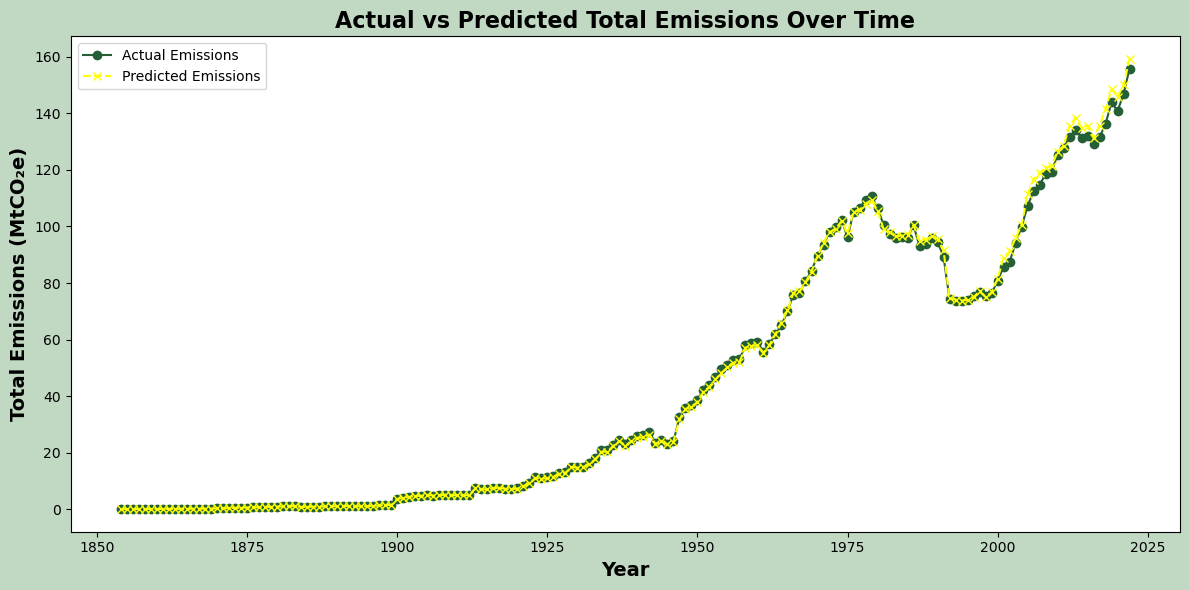

In [82]:
# Define the custom color palette
custom_palette = ["#255F38", "#659B5E", "#A4C3A2", "#44693D"]

# Group by year and calculate average values per year (optional depending on your dataset)
carbon_emissions_grouped = carbon_emissions.groupby("year").mean().reset_index()

# Predict emissions using the trained model
X_years = carbon_emissions_grouped.drop(columns=["total_emissions_MtCO2e"])  # Features
y_actual = carbon_emissions_grouped["total_emissions_MtCO2e"]  # Actual values
y_pred = rf_model.predict(X_years)

# Plot prediction vs actual
plt.figure(figsize=(12, 6))

# Plot the actual emissions line using the custom color palette
plt.plot(carbon_emissions_grouped["year"], y_actual, label="Actual Emissions", marker='o', color=custom_palette[0])

# Plot the predicted emissions line using yellow
plt.plot(carbon_emissions_grouped["year"], y_pred, label="Predicted Emissions", linestyle='--', marker='x', color='yellow')

# Titles and labels with bold font
plt.title("Actual vs Predicted Total Emissions Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Total Emissions (MtCO₂e)", fontsize=14, fontweight='bold')

# Background color and other adjustments
plt.gcf().set_facecolor('#C1D8C3')  # Set the background color
plt.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("actual_vs_predicted_emissions.jpeg", format='jpeg')

plt.show()
